In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.

    а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [23]:
df = pd.read_csv('glass.csv')

In [24]:
df.shape

(214, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [26]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [28]:
print(len(df[df.Type == 1]))
print(len(df[df.Type == 2]))
print(len(df[df.Type == 3]))
print(len(df[df.Type == 5]))
print(len(df[df.Type == 6]))
print(len(df[df.Type == 7]))

70
76
17
13
9
29


Вывод - в датафрейме представлены 214 записей для 6 видов стекла, пропусков нет. Каждый вид стекла считаем отдельным классом.

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [35]:
def get_accuracy(X,y, random_seed=100, model=None, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    if model is None:
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

In [36]:
X = df.loc[:, df.columns != "Type"]
y = df[["Type"]].values.ravel()

In [37]:
get_accuracy(X, y)

0.8604651162790697

6. Обработайте выбросы в данных.

    а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html). Есть ли признаки с нормальным распределением?

    b) Исследуйте признаки на выбросы несколькими способами.

    c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

7. Повторите п. 4, п. 5.

In [93]:
def get_boxplot(X, columns=[]):
    for i in columns:
        plt.figure(figsize=(15,5))
        sns.boxplot(x=X[i])
        plt.show()
    pass

In [107]:
def get_displot(X, columns=[]):
    for i in columns:
        plt.figure(figsize=(15,5))
        sns.displot(x=X[i])
        plt.show()
    pass

<Figure size 1080x360 with 0 Axes>

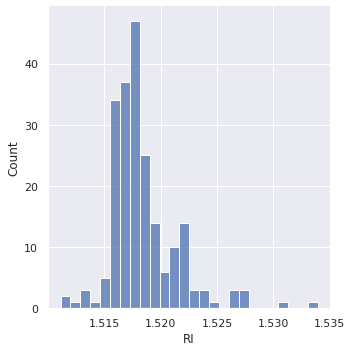

<Figure size 1080x360 with 0 Axes>

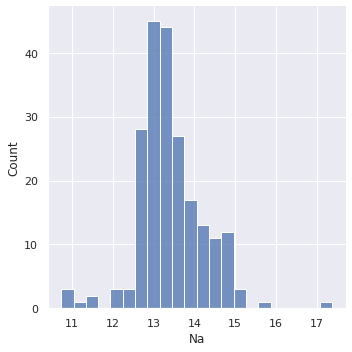

<Figure size 1080x360 with 0 Axes>

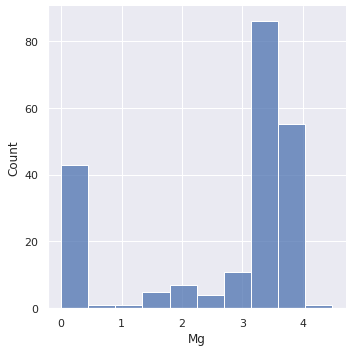

<Figure size 1080x360 with 0 Axes>

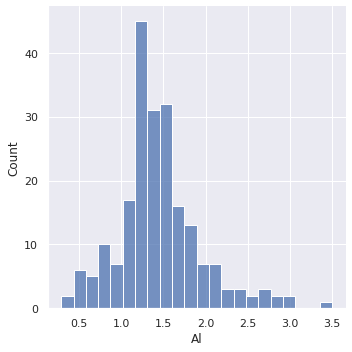

<Figure size 1080x360 with 0 Axes>

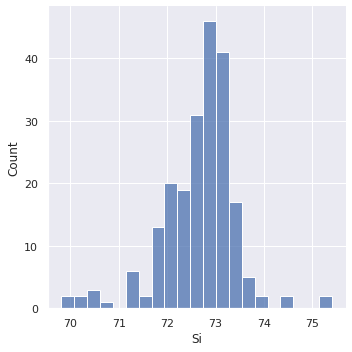

<Figure size 1080x360 with 0 Axes>

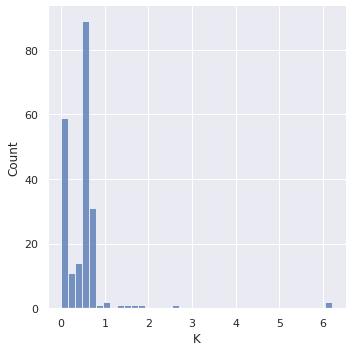

<Figure size 1080x360 with 0 Axes>

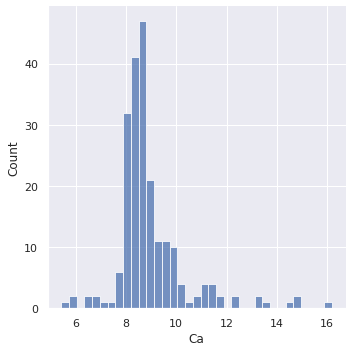

<Figure size 1080x360 with 0 Axes>

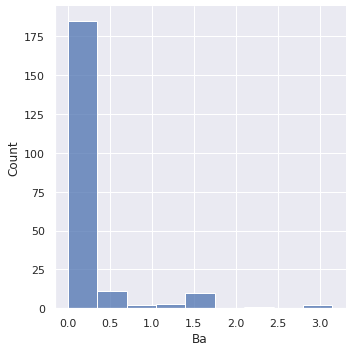

<Figure size 1080x360 with 0 Axes>

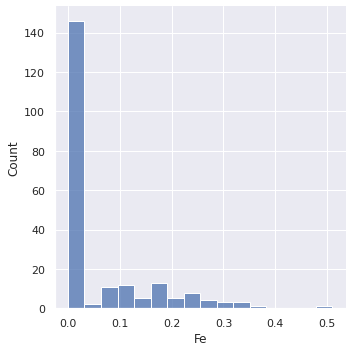

In [108]:
get_displot(df, np.array(X.columns))

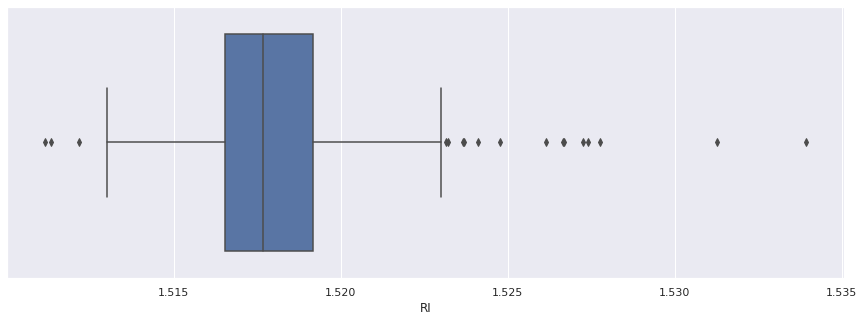

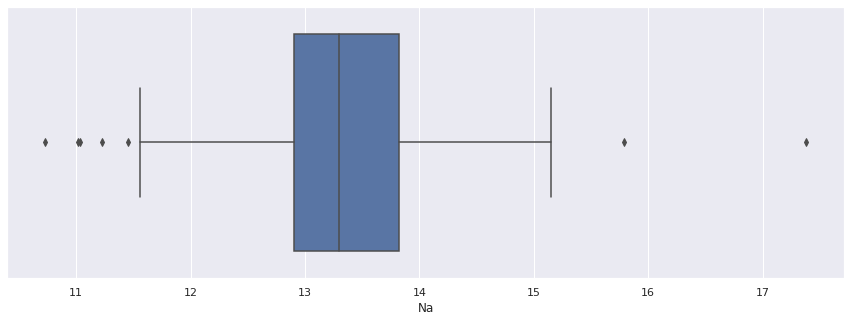

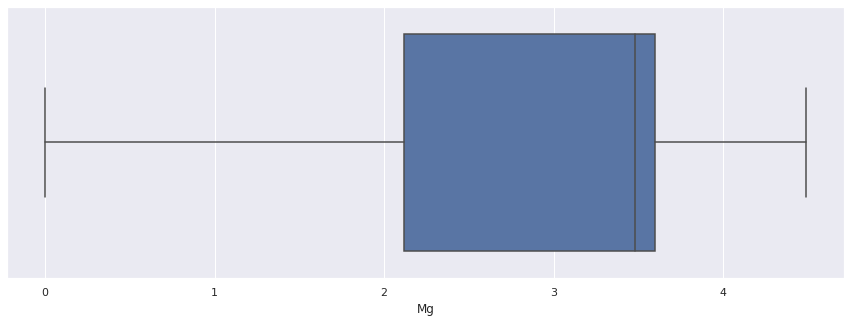

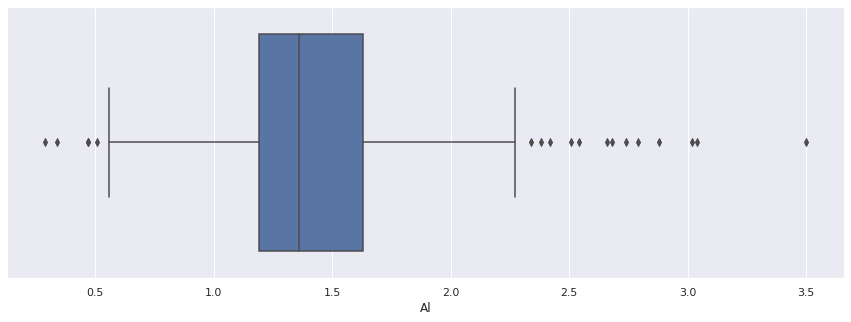

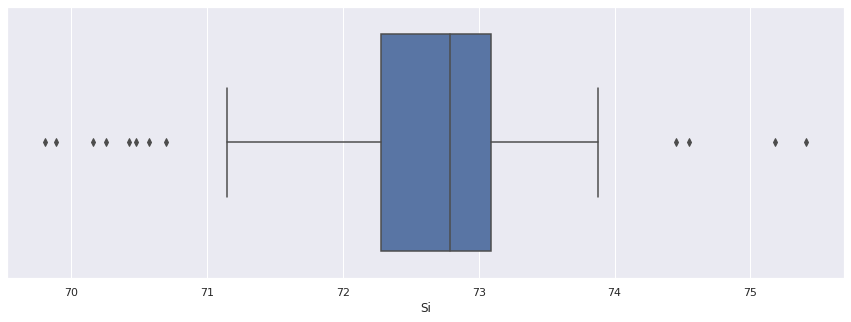

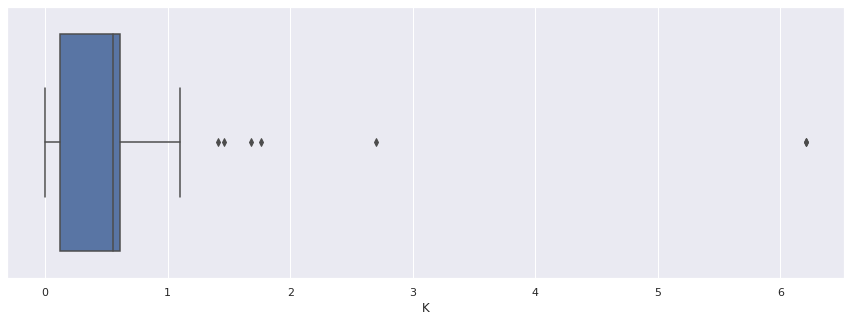

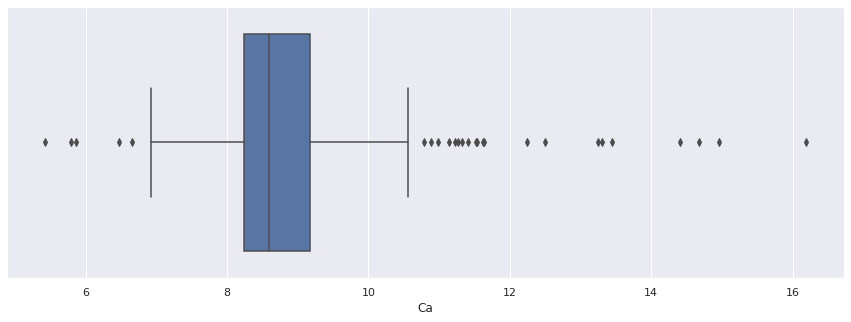

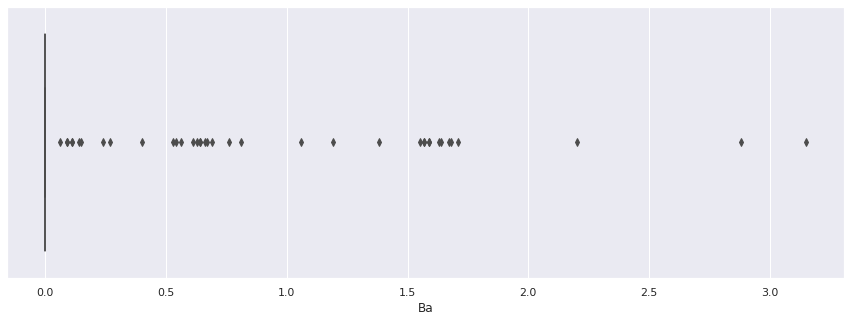

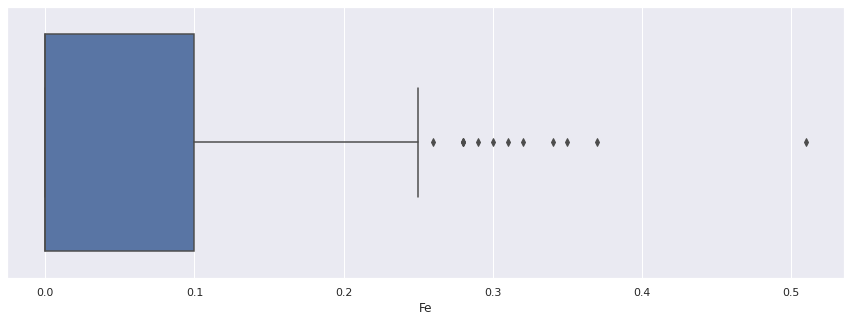

In [96]:
get_boxplot(df, np.array(X.columns))

Мы видим, что только несколько признаков имеют распределение, сколько-нибудь близкое к нормальному - RI, Na, Al, Si, Ca
Можно попытаться удалить выбросы для части признаков - RI, Na, Al, Si, Ca, K, Fe. По Mg выбросов нет, по Ba - выбросы не определяются, так как распределение очень далекое от нормального.

In [115]:
df_2 = df[
    (df['RI'] < 1.523) &
    (df['RI'] > 1.512) &
    (df['Na'] < 15.2) &
    (df['Na'] > 11.6) &
    (df['Al'] < 2.5) &
    (df['Al'] > 0.6) &
    (df['Si'] < 74) &
    (df['Si'] > 71) &
    (df['K'] < 1.2) &
    (df['Ca'] < 11.6) &
    (df['Ca'] > 7) &
    (df['Fe'] < 0.25)
]

In [116]:
df_2.shape

(162, 10)

У нас получился датафрейм на 162 записи против 214 изначальных. Процент удаленных записей для каждого класса:

In [117]:
print(100 * (len(df[df.Type == 1]) - len(df_2[df_2.Type == 1]))/len(df[df.Type == 1]))
print(100 * (len(df[df.Type == 2]) - len(df_2[df_2.Type == 2]))/len(df[df.Type == 2]))
print(100 * (len(df[df.Type == 3]) - len(df_2[df_2.Type == 3]))/len(df[df.Type == 3]))
print(100 * (len(df[df.Type == 5]) - len(df_2[df_2.Type == 5]))/len(df[df.Type == 5]))
print(100 * (len(df[df.Type == 6]) - len(df_2[df_2.Type == 6]))/len(df[df.Type == 6]))
print(100 * (len(df[df.Type == 7]) - len(df_2[df_2.Type == 7]))/len(df[df.Type == 7]))


12.857142857142858
19.736842105263158
11.764705882352942
69.23076923076923
33.333333333333336
48.275862068965516


Моделирование после удаления предполагаемых выбросов

In [118]:
X2 = df_2.loc[:, df_2.columns != "Type"]
y2 = df_2[["Type"]].values.ravel()

In [119]:
get_accuracy(X2, y2)

0.8181818181818182

8. Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

В процессе задания данные загружались в датафрейм из файла, делились на обучающую и тестовую выборки, использовались в модели для предсказания, затем были проанализированы на выбросы, очищены от выбросов и снова использовались в модели. В данном конкретном случае точность исходной модели оказалась выше, чем после очистки от предполагаемых выбросов, что означает, что такое масштабное удаление предполагаемых выбросов почти по всем признакам, которое выполнил я, не является корректным. Для получения лучшего, чем исходный, результата, следовало бы поподробнее поэкспериментировать, удаляя предполагаемые выбросы только по отдельным признакам как по очереди, так и в разных других комбинациях.
Несомненно, исследовать данные на выбросы необходимо - для улучшения качества модели, в этом и заключается плюс. А минус - трудоемкость процесса и его неоднозначность, как мы только что увидели, результат может быть достигнут не сразу, а после перебора вариантов удаления выбросов.